In [23]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict


In [24]:
class BatsmanState(TypedDict):

    runs : int
    balls : int
    fours : int
    sixes : int

    sr: float
    bpb : float
    boundary_percent : float
    summary: str

In [25]:
def calculate_sr(state: BatsmanState):

   sr= (state['runs']/state['balls'])*100

   return {'sr': sr}

In [34]:
def calculate_bpb(state: BatsmanState):

    bpb = state['runs']/(state['fours']+ state['sixes'])

    return {'bpb': bpb}

In [27]:
def calculate_boundary_percent( state: BatsmanState):

    boundary_percent = (((state['fours']* 4) + (state['sixes'] * 6))/state['runs'])*100

    return { 'boundary_percent' : boundary_percent}

In [33]:
def summary(state: BatsmanState):

    summary = f"""
    Strike Rate --> {state['sr']} \n
    Balls per Boundary---> {state['bpb']} \n
    Boundary percent ---> {state['boundary_percent']}
    """

    return {'summary': summary}

In [35]:
graph = StateGraph(BatsmanState)


# add nodes
graph.add_node("calculate_sr",calculate_sr)
graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_boundary_percent",calculate_boundary_percent)
graph.add_node("summary",summary)

# add edges

graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_boundary_percent')

graph.add_edge("calculate_sr",'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundary_percent','summary')

graph.add_edge('summary',END)

workflow = graph.compile()


# compile graph

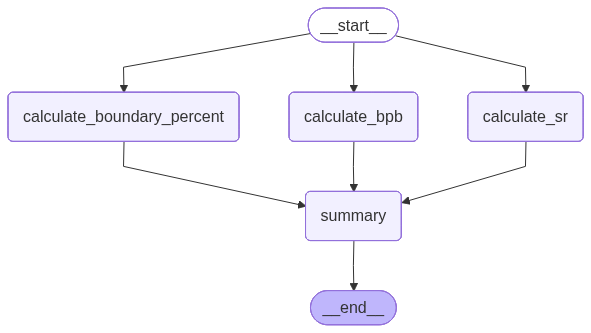

In [30]:
workflow

In [36]:

initial_state = {
    'runs' : 102,
    'balls' : 62,
    'fours' : 8,
    'sixes' : 5
}

workflow.invoke(initial_state)

{'runs': 102,
 'balls': 62,
 'fours': 8,
 'sixes': 5,
 'sr': 164.51612903225808,
 'bpb': 7.846153846153846,
 'boundary_percent': 60.78431372549019,
 'summary': '\n    Strike Rate --> 164.51612903225808 \n\n    Balls per Boundary---> 7.846153846153846 \n\n    Boundary percent ---> 60.78431372549019\n    '}